<a href="https://colab.research.google.com/github/shishiradk/langgraph-chatbot/blob/main/langraph_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Chatbot with langgarph



In [ ]:
!pip install langgraph langsmith

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 7.7 MB/s eta 0:00:00


In [ ]:
!pip install langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [ ]:
from google.colab import userdata
GROQ_API_KEY = userdata.get('GROQ_API_KEY')
LANGCHAIN_API_KEY= userdata.get('LANGCHAIN_API_KEY')


In [ ]:
import os
os.environ['GROQ_API_KEY'] = GROQ_API_KEY
os.environ['LANGCHAIN_API_KEY'] = LANGCHAIN_API_KEY
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'
os.environ["LANGCHAIN_PROJECT"] = "langgraph-chatbot"

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
llm= ChatGroq(model_name="openai/gpt-oss-20b")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7c0e32bca930>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7c0e1f5d8980>, model_name='openai/gpt-oss-20b', model_kwargs={}, groq_api_key=SecretStr('**********'))

### Start building chatbot using langgraph

In [ ]:
from typing import Annotated, TypedDict
from typing_extensions import TypedDict as _TypedDict_extensions # Avoid naming conflict if both are needed
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
  #Messages have the type "list". The `add_message` function
  #in the annotation defines how this state key should be updated (in this case, it appends message to the list, rather than oveewriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [ ]:
graph_builder

In [ ]:
def chatbot(state:State):
  return { "messages": llm.invoke(state['messages'])}

In [ ]:
graph_builder.add_node("chatbot",chatbot)

In [ ]:
graph_builder

In [ ]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [ ]:
graph=graph_builder.compile()

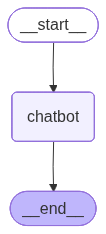

In [ ]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input=input("User:")
  if user_input.lower() in ["quit","q"]:
    print("good Bye")
    break
  for event in graph.stream({'messages':[("user",user_input)]}):
    # print(event.values()) # You can uncomment this line if you want to see the raw event values
    for value in event.values():
      if 'messages' in value:
        # Access the content directly from the AIMessage object
        print("Assistant:" , value["messages"].content)

User:hello
Assistant: Hello! 👋 How can I help you today?
User:what is gen ai
Assistant: **Gen AI** (short for **Generative AI**) is a branch of artificial intelligence that focuses on creating new content—text, images, audio, video, code, and more—rather than just analyzing or interpreting existing data. Unlike traditional AI models that classify or predict based on patterns, generative models learn the underlying distribution of a dataset and then use that knowledge to *generate* fresh, plausible samples that resemble the training data.

---

## 1. Core Concepts

| Concept | What it means | Example |
|---------|---------------|---------|
| **Generative Model** | Learns the probability distribution \(P(x)\) of data \(x\). | A language model that learns how words co‑occur. |
| **Latent Space** | A compressed, often lower‑dimensional representation of data. | A 512‑dimensional vector that encodes a sentence’s meaning. |
| **Decoder** | Transforms latent vectors back into observable data.